In [1]:
import numpy as np
import h5py
import itertools
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
from decimal import *

%matplotlib inline

Using TensorFlow backend.


In [2]:
labels = h5py.File('aid_result/aid_xception/dp_0.2/confusion_matrix/aid_xceptionv3_dp_0.2_predict_true_label_for_confusion_matrix.h5', 'r')

In [3]:
predict_label = labels['predict_label'][:]
true_label = labels['true_label'][:]

In [4]:
predict_label.shape

(2000,)

In [5]:
labels = ['0 - Airport ','1 - Bareland ','2 - Baseball field ','3 - Beach ','4 - Bridge ',
          '5 - Center ','6 - Church ','7 - Commercial ','8 - Dense Residential ','9 - Desert ',
          '10 - Farmland ','11 - Forest ','12 - Industrial ','13 - Meadow ','14 - Medium Residential ',
          '15 - Mountain ','16 - Park ','17 - Parking ','18 - Playground ','19 - Pond ',
          '20 - Port ','21 - Railway Station ','22 - Resort ','23 - River ','24 - School ',
          '25 - Sparse Residential ','26 - Square ','27 - Stadium ','28 - Storage Tanks ','29 - Viaduct ']

In [7]:
# comfusion matrix
def plot_sonfusion_matrix(cm, percent, classes, normalize=False, cmap=plt.cm.gray_r):
    fig = plt.figure(figsize=(12, 9.7))
    
    ax = fig.add_subplot(111)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.set_title('Confusion Matrix for Predicting AID Using Resnet 50 and A Batch Size of 64')
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(labels)
    
    ax1 = ax.twinx()
    ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    ax1.set_yticks(tick_marks)
    ax1.set_yticklabels(percent)
    
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    thresh = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], va='center', ha='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    ax.set_ylabel('True')
    ax.set_xlabel('Predict')
    
    #plt.savefig('confusion_matirx.png', dpi=200)

In [8]:
confusion_mat = confusion_matrix(true_label, predict_label)

In [14]:
confusion_mat.shape

(30, 30)

In [10]:
# Calculate the correct percentage of prediction
percent = np.zeros((1,30))
sum_of_each_label = confusion_mat.sum(axis=1)
for i in range(30):
    percent[0][i] = Decimal(confusion_mat[i][i] / sum_of_each_label[i] * 100).quantize(Decimal('0.00'))

In [11]:
percent_label = ['','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
for j in range(30):
    percent_label[j] = ' ' + str(percent[0][j]) + ' %'

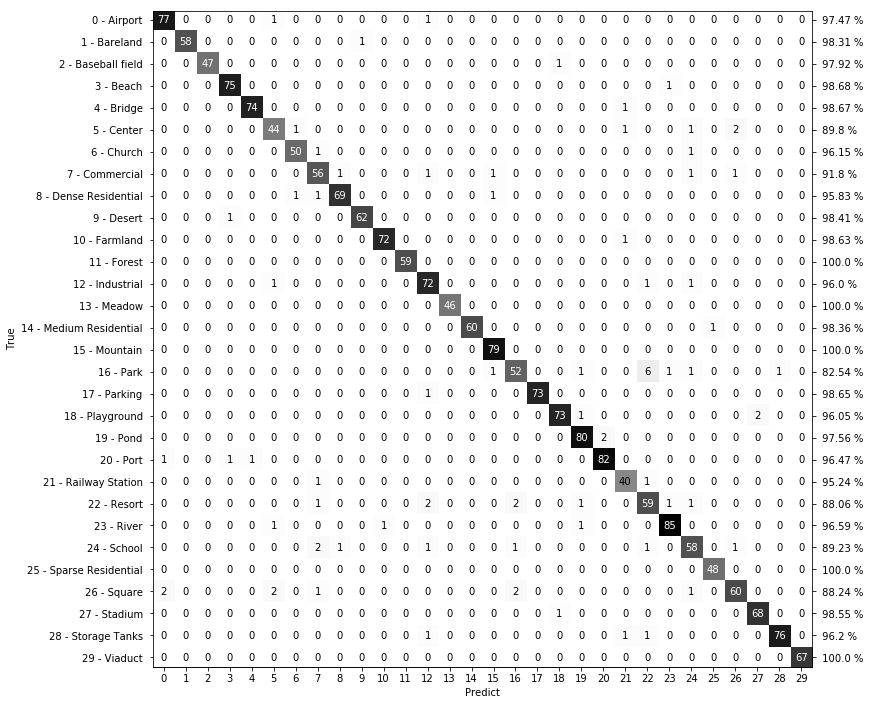

In [12]:
plot_sonfusion_matrix(confusion_mat, percent_label, classes = range(30))